In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
buydata = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/purchase6.csv')

In [4]:
# 원본 데이터 copy
buydata_df = buydata.iloc[:, 1:]

In [5]:
buydata_df['구매일자(년도)'] = buydata_df['구매일자'].astype('string').str[:4]

In [6]:
buydata_df['분기'] = np.where(buydata_df['구매일자'] < 20140401, '2014_1분기',
                                  np.where(buydata_df['구매일자'] < 20140701, '2014_2분기',
                                           np.where(buydata_df['구매일자'] < 20141001, '2014_3분기',
                                                    np.where(buydata_df['구매일자'] < 20150101, '2014_4분기',
                                                             np.where(buydata_df['구매일자'] < 20150401, '2015_1분기',
                                                                      np.where(buydata_df['구매일자'] < 20150701, '2015_2분기',
                                                                               np.where(buydata_df['구매일자'] < 20151001, '2015_3분기','2015_4분기')))))))

buydata_df[:5]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기
3,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,3960475,12,20150327,12,1000,2015,2015_1분기
4,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,5602223,12,20151130,17,6800,2015,2015_4분기


In [ ]:
buydata_df.shape

(28593030, 12)

In [ ]:
buydata_df.isna().sum()

고객번호     0
성별       0
연령대      0
거주지역     0
제휴사      0
중분류명     0
소분류명     0
영수증번호    0
점포코드     0
구매일자     0
구매시간     0
구매금액     0
dtype: int64

In [ ]:
len(buydata_df['점포코드'].unique())

593

# B 제휴사의 유의고객 선정
연도별 감소고객 확인, 분기별 감소고객 확인

In [ ]:
market_B = buydata_df.query("제휴사 == 'B'")
market_B[:5]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
874,1,M,60세이상,서울특별시 강남구,B,농산물,기능성미,7068855,13,20141023,14,22000,2014,2014_4분기
875,1,M,60세이상,서울특별시 강남구,B,식당,뷔페레스토랑,7069008,13,20141023,13,48400,2014,2014_4분기
876,1,M,60세이상,서울특별시 강남구,B,식당,뷔페레스토랑,93124,4,20140227,12,21800,2014,2014_1분기
877,1,M,60세이상,서울특별시 강남구,B,식당,한식레스토랑,117058,4,20150921,12,28900,2015,2015_3분기
878,1,M,60세이상,서울특별시 강남구,B,식당,한식레스토랑,114660,4,20150727,12,15900,2015,2015_3분기


## 분기별 감소고객

In [ ]:
# 분기별 감소고객 확인
quart = pd.pivot_table(data=market_B, values='구매금액', index='고객번호', columns='분기', aggfunc='sum')
quart

In [ ]:
quart.fillna(0, inplace=True)

### 2015_4분기 구매금액과 2014_1분기 구매금액 비교 (성장률)

In [ ]:
# 2014_1분기에 비해 2015_4분기에 성장한 비율 (성장률)
m = ( ( sum(quart['2015_4분기']) - sum(quart['2014_1분기']) ) / sum(quart['2014_1분기']) ) * 100
m = np.round(m, 3)
m

-7.416

In [ ]:
quart['성장률(8분기_1분기)'] = ( (quart['2015_4분기'] - quart['2014_1분기']) / quart['2014_1분기'] ) * 100
quart[:5]

In [ ]:
quart[quart['성장률(8분기_1분기)'] < m]

In [ ]:
quart[quart['성장률(8분기_1분기)'] < m].sort_values(by='성장률(8분기_1분기)')

In [ ]:
quart[quart['2015_4분기'] == 0]

In [ ]:
quart.fillna(0, inplace=True)

In [ ]:
quart[:5]

### 분기별 구매금액 평균

In [ ]:
market_B[:5]

In [ ]:
a = market_B.groupby(['고객번호', '분기'], as_index=False)[['구매금액']].sum()
a

In [ ]:
a.groupby('고객번호')[['구매금액']].mean().rename(columns={'구매금액' : '분기별_구매금액_평균값'})

## 연도별 감소고객

In [ ]:
# 연도별 감소고객 확인
year = pd.pivot_table(data=market_B, values='구매금액', index='고객번호', columns='구매일자(년도)', aggfunc='sum')
year

구매일자(년도),2014,2015
고객번호,,
1,397940.0,393036.0
2,76950.0,132500.0
3,6960.0,NaN
4,500800.0,1093266.0
5,16000.0,NaN
...,...,...
19379,NaN,300980.0
19380,NaN,60280.0
19381,NaN,5614579.0


In [ ]:
year.fillna(0.0, inplace=True)

In [ ]:
'''
plt.rc('font', family='NanumBarunGothic')
fig = px.line(year, x='구매일자(년도)', y='구매금액', color='고객번호')
fig.show()
'''

"\nplt.rc('font', family='NanumBarunGothic')\nfig = px.line(year, x='구매일자(년도)', y='구매금액', color='고객번호')\nfig.show()\n"

In [ ]:
year['증감'] = year['2015'] - year['2014']
year[:5]

구매일자(년도),2014,2015,증감
고객번호,,,
1,397940.0,393036.0,-4904.0
2,76950.0,132500.0,55550.0
3,6960.0,0.0,-6960.0
4,500800.0,1093266.0,592466.0
5,16000.0,0.0,-16000.0


In [ ]:
year.query("증감 < 0").sort_values(by='증감')[:10]

구매일자(년도),2014,2015,증감
고객번호,,,
7957,2.097600e+09,30284580.0,-2.067315e+09
6207,9.348479e+08,3535122.0,-9.313127e+08
9272,4.362416e+08,555599.0,-4.356860e+08
11763,5.696042e+08,316567677.0,-2.530365e+08
8634,2.031576e+08,11157950.0,-1.919996e+08
10487,2.523286e+08,95824910.0,-1.565037e+08
8214,1.597769e+08,23802990.0,-1.359739e+08
9776,1.505152e+08,16267235.0,-1.342479e+08
5720,8.911741e+07,11175895.0,-7.794151e+07


### 연도별 구매금액 성장률

In [ ]:
year[:5]

구매일자(년도),2014,2015,증감
고객번호,,,
1,397940.0,393036.0,-4904.0
2,76950.0,132500.0,55550.0
3,6960.0,0.0,-6960.0
4,500800.0,1093266.0,592466.0
5,16000.0,0.0,-16000.0


In [ ]:
# 성장률
m = ( ( sum(year['2015']) - sum(year['2014']) ) / sum(year['2014']) ) * 100
m = np.round(m, 3)
m

-2.697

In [ ]:
year['성장률'] = ( ( year['2015'] - year['2014'] ) / year['2014'] ) * 100
year[:5]

구매일자(년도),2014,2015,증감,성장률
고객번호,,,,
1,397940.0,393036.0,-4904.0,-1.232347
2,76950.0,132500.0,55550.0,72.189734
3,6960.0,0.0,-6960.0,-100.000000
4,500800.0,1093266.0,592466.0,118.303914
5,16000.0,0.0,-16000.0,-100.000000


In [ ]:
year_growth = year[year['성장률'] < m].sort_values(by='성장률')
year_growth

구매일자(년도),2014,2015,증감,성장률
고객번호,,,,
3,6960.0,0.0,-6960.0,-100.000000
7637,46294.0,0.0,-46294.0,-100.000000
7631,12740.0,0.0,-12740.0,-100.000000
7616,27600.0,0.0,-27600.0,-100.000000
7600,93400.0,0.0,-93400.0,-100.000000
...,...,...,...,...
18676,3666501.0,3566201.0,-100300.0,-2.735578
15678,5719107.0,5563447.0,-155660.0,-2.721754
9660,1726170.0,1679240.0,-46930.0,-2.718736


In [ ]:
len(year_growth)

8111

In [ ]:
customer_lst = []

for i in range(len(year_growth)):
  customer_lst.append(year_growth.index[i])

customer_lst

In [ ]:
year_growth.to_csv("/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/year_growth.csv", index = False)

#### 성장률을 기준으로 등급 나누기

In [ ]:
year_growth['성장률(8분기_1분기)'].describe()

count    8111.000000
mean      -46.967273
std        33.395503
min      -100.000000
25%       -77.287767
50%       -38.535830
75%       -17.233905
max        -2.700611
Name: 성장률(8분기_1분기), dtype: float64

In [ ]:
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.1))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.2))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.3))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.4))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.5))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.6))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.7))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.8))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 0.9))
print(np.quantile(year_growth['성장률(8분기_1분기)'], 1.0))

-100.0
-88.41885873857152
-67.41695837107382
-50.7617575623758
-38.5358302976
-28.401832083769474
-20.504805219148718
-14.018944284140334
-8.171270992997853
-2.700610512824583


In [ ]:
'''
year_growth['감소등급'] = np.where(year_growth['성장률(8분기_1분기)'] < 20140401, '2014_1분기',
                                  np.where(year_growth['성장률(8분기_1분기)'] < 20140701, '2014_2분기',
                                           np.where(year_growth['성장률(8분기_1분기)'] < 20141001, '2014_3분기',
                                                    np.where(year_growth['성장률(8분기_1분기)'] < 20150101, '2014_4분기',
                                                             np.where(year_growth['성장률(8분기_1분기)'] < 20150401, '2015_1분기',
                                                                      np.where(year_growth['성장률(8분기_1분기)'] < 20150701, '2015_2분기',
                                                                               np.where(year_growth['성장률(8분기_1분기)'] < 20151001, '2015_3분기','2015_4분기')))))))

year_growth[:5]
'''

## 유의고객 데이터 csv 파일로 저장

In [ ]:
year_growth = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/year_growth.csv')
year_growth

,2014,2015,증감,성장률
0,6960.0,0.0,-6960.0,-100.000000
1,46294.0,0.0,-46294.0,-100.000000
2,12740.0,0.0,-12740.0,-100.000000
3,27600.0,0.0,-27600.0,-100.000000
4,93400.0,0.0,-93400.0,-100.000000
...,...,...,...,...
8106,3666501.0,3566201.0,-100300.0,-2.735578
8107,5719107.0,5563447.0,-155660.0,-2.721754
8108,1726170.0,1679240.0,-46930.0,-2.718736
8109,6801310.0,6617128.0,-184182.0,-2.708037


In [ ]:
year_growth['고객번호'] = customer_lst
year_growth

,2014,2015,증감,성장률,고객번호
0,6960.0,0.0,-6960.0,-100.000000,3
1,46294.0,0.0,-46294.0,-100.000000,7637
2,12740.0,0.0,-12740.0,-100.000000,7631
3,27600.0,0.0,-27600.0,-100.000000,7616
4,93400.0,0.0,-93400.0,-100.000000,7600
...,...,...,...,...,...
8106,3666501.0,3566201.0,-100300.0,-2.735578,18676
8107,5719107.0,5563447.0,-155660.0,-2.721754,15678
8108,1726170.0,1679240.0,-46930.0,-2.718736,9660
8109,6801310.0,6617128.0,-184182.0,-2.708037,1669


In [ ]:
year_growth.to_csv("/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/year_growth_1.csv", index = False)

# 피처 데이터 생성

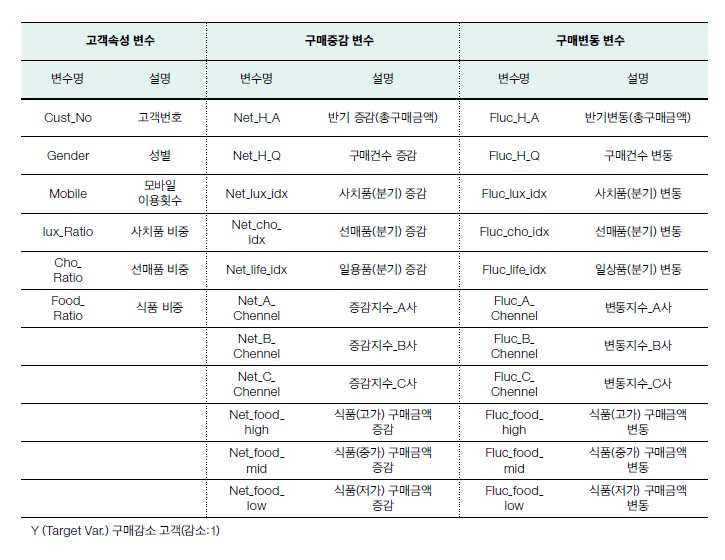

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
customer = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/cust_list.csv').iloc[:, 1:]
customer

,고객번호,성별,연령대,거주지역
0,3,M,60세이상,33.0
1,5,M,60세이상,100.0
2,7,F,60세이상,36.0
3,8,M,60세이상,10.0
4,11,M,60세이상,100.0
...,...,...,...,...
8106,19356,F,40세~44세,100.0
8107,19358,M,60세이상,500.0
8108,19360,F,45세~49세,75.0
8109,19364,F,25세~29세,210.0


## '하루 방문 단가평균' 변수 생성

In [ ]:
buydata_df[:5]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기
3,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,3960475,12,20150327,12,1000,2015,2015_1분기
4,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,5602223,12,20151130,17,6800,2015,2015_4분기


In [ ]:
cust_lst = []

for i in range(len(customer)):
  cust_lst.append(customer['고객번호'][i])

cust_lst

In [10]:
a = buydata_df[buydata_df['고객번호'].isin(cust_lst)]
a = a.reset_index().iloc[:, 1:]
a

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
0,3,M,60세이상,서울특별시 은평구,A,셔츠,비지니스군,2201083,1,20140623,11,80000,2014,2014_2분기
1,3,M,60세이상,서울특별시 은평구,B,가공식품,일반빵류,6792987,9,20140901,12,1960,2014,2014_3분기
2,3,M,60세이상,서울특별시 은평구,B,식기,컵,6792987,9,20140901,12,5000,2014,2014_3분기
3,3,M,60세이상,서울특별시 은평구,C,농산물,사과,683769,34,20140420,15,5990,2014,2014_2분기
4,3,M,60세이상,서울특별시 은평구,C,농산물,감,686536,34,20141004,12,3990,2014,2014_4분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11980448,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,5954475,109,20150306,17,100,2015,2015_1분기
11980449,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,5954224,109,20150218,19,200,2015,2015_1분기
11980450,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,6102137,141,20150910,20,100,2015,2015_3분기
11980451,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,6101912,141,20150819,22,100,2015,2015_3분기


In [ ]:
aa = a.groupby(['고객번호', '구매일자'], as_index=False)[['구매금액']].sum()
aa

,고객번호,구매일자,구매금액
0,3,20140103,9729
1,3,20140104,1080
2,3,20140106,11110
3,3,20140107,1080
4,3,20140108,1080
...,...,...,...
2508863,19368,20151225,6980
2508864,19368,20151226,1000
2508865,19368,20151228,1000
2508866,19368,20151230,5000


In [ ]:
day_means = aa.groupby('고객번호', as_index=False)[['구매금액']].mean()
day_means.rename(columns={'구매금액' : '하루방문_단가평균'}, inplace=True)
day_means

,고객번호,하루방문_단가평균
0,3,7992.845960
1,5,55852.616034
2,7,246576.173913
3,8,168986.319783
4,11,668493.310881
...,...,...
8106,19356,20082.974277
8107,19358,13007.846561
8108,19360,26853.920455
8109,19364,56083.172414


In [ ]:
day_means.to_csv("/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/day_means.csv", index = False)

## 전체 제휴사 구매금액 중 B사 구매비율지수
B구매/ABCD구매

In [ ]:
a

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
0,3,M,60세이상,서울특별시 은평구,A,셔츠,비지니스군,2201083,1,20140623,11,80000,2014,2014_2분기
1,3,M,60세이상,서울특별시 은평구,B,가공식품,일반빵류,6792987,9,20140901,12,1960,2014,2014_3분기
2,3,M,60세이상,서울특별시 은평구,B,식기,컵,6792987,9,20140901,12,5000,2014,2014_3분기
3,3,M,60세이상,서울특별시 은평구,C,농산물,사과,683769,34,20140420,15,5990,2014,2014_2분기
4,3,M,60세이상,서울특별시 은평구,C,농산물,감,686536,34,20141004,12,3990,2014,2014_4분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11980448,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,5954475,109,20150306,17,100,2015,2015_1분기
11980449,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,5954224,109,20150218,19,200,2015,2015_1분기
11980450,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,6102137,141,20150910,20,100,2015,2015_3분기
11980451,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,6101912,141,20150819,22,100,2015,2015_3분기


In [ ]:
a[a['고객번호'] == 3].query("제휴사 == 'B'")

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
1,3,M,60세이상,서울특별시 은평구,B,가공식품,일반빵류,6792987,9,20140901,12,1960,2014,2014_3분기
2,3,M,60세이상,서울특별시 은평구,B,식기,컵,6792987,9,20140901,12,5000,2014,2014_3분기


In [ ]:
b = a.groupby(['고객번호', '제휴사'], as_index=False)[['구매금액']].sum()
b.query("제휴사 == 'B'")

,고객번호,제휴사,구매금액
1,3,B,6960
4,5,B,16000
7,7,B,1712491
10,8,B,662042
13,11,B,514660
...,...,...,...
24774,19356,B,17200
24777,19358,B,27188
24780,19360,B,58610
24783,19364,B,127700


In [ ]:
bb = b.query("제휴사 == 'B'").reset_index().iloc[:, 1:]
bb.rename(columns={'구매금액' : 'B사_구매금액'}, inplace=True)
bb

,고객번호,제휴사,B사_구매금액
0,3,B,6960
1,5,B,16000
2,7,B,1712491
3,8,B,662042
4,11,B,514660
...,...,...,...
8106,19356,B,17200
8107,19358,B,27188
8108,19360,B,58610
8109,19364,B,127700


In [ ]:
cc = a.groupby('고객번호', as_index=False)[['구매금액']].sum()
cc.rename(columns={'구매금액' : '전체구매금액'}, inplace=True)
cc

,고객번호,전체구매금액
0,3,3165167
1,5,13237070
2,7,73726276
3,8,62355952
4,11,129019209
...,...,...
8106,19356,6245805
8107,19358,4916966
8108,19360,4726290
8109,19364,16264120


In [ ]:
df = pd.merge(bb, cc, on='고객번호')
df

,고객번호,제휴사,B사_구매금액,전체구매금액
0,3,B,6960,3165167
1,5,B,16000,13237070
2,7,B,1712491,73726276
3,8,B,662042,62355952
4,11,B,514660,129019209
...,...,...,...,...
8106,19356,B,17200,6245805
8107,19358,B,27188,4916966
8108,19360,B,58610,4726290
8109,19364,B,127700,16264120


In [ ]:
df.drop(columns='B사_구매비율', inplace=True)
df

,고객번호,제휴사,B사_구매금액,전체구매금액
0,3,B,6960,3165167
1,5,B,16000,13237070
2,7,B,1712491,73726276
3,8,B,662042,62355952
4,11,B,514660,129019209
...,...,...,...,...
8106,19356,B,17200,6245805
8107,19358,B,27188,4916966
8108,19360,B,58610,4726290
8109,19364,B,127700,16264120


In [ ]:
# B구매/ABCD구매
df['B사_구매비율'] = (df['B사_구매금액'] / df['전체구매금액']).round(6)
df

,고객번호,제휴사,B사_구매금액,전체구매금액,B사_구매비율
0,3,B,6960,3165167,0.002199
1,5,B,16000,13237070,0.001209
2,7,B,1712491,73726276,0.023228
3,8,B,662042,62355952,0.010617
4,11,B,514660,129019209,0.003989
...,...,...,...,...,...
8106,19356,B,17200,6245805,0.002754
8107,19358,B,27188,4916966,0.005529
8108,19360,B,58610,4726290,0.012401
8109,19364,B,127700,16264120,0.007852


In [ ]:
6960 / 3165167

0.002198936106688841

In [ ]:
df.sort_values(by='B사_구매비율', ascending=False)

,고객번호,제휴사,B사_구매금액,전체구매금액,B사_구매비율
8067,19240,B,32700,32700,1.000000
8062,19229,B,252536,252536,1.000000
8055,19212,B,63240,63240,1.000000
6721,15763,B,11051562,11051562,1.000000
8089,19294,B,131650,131650,1.000000
...,...,...,...,...,...
2452,5687,B,1000,31284880,0.000032
4084,9418,B,1200,56451467,0.000021
3404,7760,B,2400,139063960,0.000017
570,1406,B,3000,209468790,0.000014


In [ ]:
df.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/b_use_rate.csv')

## 증감지수 B사

In [ ]:
b_data = a.query("제휴사 == 'B'").reset_index().iloc[:, 1:]
b_data

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
0,3,M,60세이상,서울특별시 은평구,B,가공식품,일반빵류,6792987,9,20140901,12,1960,2014,2014_3분기
1,3,M,60세이상,서울특별시 은평구,B,식기,컵,6792987,9,20140901,12,5000,2014,2014_3분기
2,5,M,60세이상,경기도 김포시,B,수산품,게,7579691,18,20140214,17,16000,2014,2014_1분기
3,7,F,60세이상,서울특별시 서대문구,B,농산물,애호박,6362233,6,20150105,21,1900,2015,2015_1분기
4,7,F,60세이상,서울특별시 서대문구,B,농산물,애호박,6367232,6,20150214,22,2400,2015,2015_1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143875,19360,F,45세~49세,서울특별시 강서구,B,주방용품,주방균일가,8570718,41,20140911,23,19000,2014,2014_3분기
5143876,19360,F,45세~49세,서울특별시 강서구,B,생활잡화,종량제봉투,8570718,41,20140911,23,380,2014,2014_3분기
5143877,19360,F,45세~49세,서울특별시 강서구,B,생활잡화,욕실소품,8570718,41,20140911,23,3700,2014,2014_3분기
5143878,19364,F,25세~29세,인천광역시 계양구,B,아동,액션피겨,6792831,9,20140830,11,127700,2014,2014_3분기


In [ ]:
b_data_year = pd.pivot_table(data=b_data, values='구매금액', index='고객번호', columns='구매일자(년도)', aggfunc='sum')
b_data_year

구매일자(년도),2014,2015
고객번호,,
3,6960.0,NaN
5,16000.0,NaN
7,1051507.0,660984.0
8,398342.0,263700.0
11,439940.0,74720.0
...,...,...
19356,17200.0,NaN
19358,27188.0,NaN
19360,58610.0,NaN


In [ ]:
b_data_year.fillna(0.0, inplace=True)

In [ ]:
b_data_year

구매일자(년도),2014,2015
고객번호,,
3,6960.0,0.0
5,16000.0,0.0
7,1051507.0,660984.0
8,398342.0,263700.0
11,439940.0,74720.0
...,...,...
19356,17200.0,0.0
19358,27188.0,0.0
19360,58610.0,0.0


In [ ]:
b_data_year['증감'] = b_data_year['2015'] - b_data_year['2014']
b_data_year

구매일자(년도),2014,2015,증감
고객번호,,,
3,6960.0,0.0,-6960.0
5,16000.0,0.0,-16000.0
7,1051507.0,660984.0,-390523.0
8,398342.0,263700.0,-134642.0
11,439940.0,74720.0,-365220.0
...,...,...,...
19356,17200.0,0.0,-17200.0
19358,27188.0,0.0,-27188.0
19360,58610.0,0.0,-58610.0


In [ ]:
b_data_year.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/b_data_year_growth.csv')

In [ ]:
pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/b_data_year_growth.csv')

,고객번호,2014,2015,증감
0,3,6960.0,0.0,-6960.0
1,5,16000.0,0.0,-16000.0
2,7,1051507.0,660984.0,-390523.0
3,8,398342.0,263700.0,-134642.0
4,11,439940.0,74720.0,-365220.0
...,...,...,...,...
8106,19356,17200.0,0.0,-17200.0
8107,19358,27188.0,0.0,-27188.0
8108,19360,58610.0,0.0,-58610.0
8109,19364,127700.0,0.0,-127700.0


## B 제휴사 방문횟수


In [7]:
customer[:5]

,고객번호,성별,연령대,거주지역
0,3,M,60세이상,33.0
1,5,M,60세이상,100.0
2,7,F,60세이상,36.0
3,8,M,60세이상,10.0
4,11,M,60세이상,100.0


In [37]:
# 유의고객만 있는 데이터 프레임
a

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자(년도),분기
0,3,M,60세이상,서울특별시 은평구,A,셔츠,비지니스군,2201083,1,20140623,11,80000,2014,2014_2분기
1,3,M,60세이상,서울특별시 은평구,B,가공식품,일반빵류,6792987,9,20140901,12,1960,2014,2014_3분기
2,3,M,60세이상,서울특별시 은평구,B,식기,컵,6792987,9,20140901,12,5000,2014,2014_3분기
3,3,M,60세이상,서울특별시 은평구,C,농산물,사과,683769,34,20140420,15,5990,2014,2014_2분기
4,3,M,60세이상,서울특별시 은평구,C,농산물,감,686536,34,20141004,12,3990,2014,2014_4분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11980448,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,5954475,109,20150306,17,100,2015,2015_1분기
11980449,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,5954224,109,20150218,19,200,2015,2015_1분기
11980450,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,6102137,141,20150910,20,100,2015,2015_3분기
11980451,19368,F,45세~49세,서울특별시 성동구,C,생활잡화,생활잡화균일가,6101912,141,20150819,22,100,2015,2015_3분기


In [39]:
A_count = a[a['제휴사'] == 'A'].groupby(['고객번호', '구매일자'], as_index=False)[['구매금액']].sum()
A_counts = A_count.groupby('고객번호')[['구매일자']].count()

B_count = a[a['제휴사'] == 'B'].groupby(['고객번호', '구매일자'], as_index=False)[['구매금액']].sum()
B_counts = B_count.groupby('고객번호')[['구매일자']].count()

C_count = a[a['제휴사'] == 'C'].groupby(['고객번호', '구매일자'], as_index=False)[['구매금액']].sum()
C_counts = C_count.groupby('고객번호')[['구매일자']].count()

D_count = a[a['제휴사'] == 'D'].groupby(['고객번호', '구매일자'], as_index=False)[['구매금액']].sum()
D_counts = D_count.groupby('고객번호')[['구매일자']].count()

In [42]:
A_counts.rename(columns={'구매일자' : 'A사_방문횟수'}, inplace=True)
B_counts.rename(columns={'구매일자' : 'B사_방문횟수'}, inplace=True)
C_counts.rename(columns={'구매일자' : 'C사_방문횟수'}, inplace=True)
D_counts.rename(columns={'구매일자' : 'D사_방문횟수'}, inplace=True)

In [43]:
A_counts[:5]

,A사_방문횟수
고객번호,
3,1
5,233
7,275
8,364
11,176


In [49]:
a1 = pd.merge(A_counts, B_counts, on='고객번호', how='outer')
print(a1[:5])

a2 = pd.merge(a1, C_counts, on='고객번호', how='outer')
print(a2[:5])

visit_count = pd.merge(a2, D_counts, on='고객번호', how='outer')

      A사_방문횟수  B사_방문횟수
고객번호                  
3         1.0        1
5       233.0        1
7       275.0       28
8       364.0        6
11      176.0       11
      A사_방문횟수  B사_방문횟수  C사_방문횟수
고객번호                           
3         1.0        1    395.0
5       233.0        1      NaN
7       275.0       28     10.0
8       364.0        6      1.0
11      176.0       11     16.0


In [50]:
visit_count[:5]

,A사_방문횟수,B사_방문횟수,C사_방문횟수,D사_방문횟수
고객번호,,,,
3,1.0,1,395.0,NaN
5,233.0,1,NaN,4.0
7,275.0,28,10.0,NaN
8,364.0,6,1.0,NaN
11,176.0,11,16.0,NaN


In [51]:
visit_count.fillna(0, inplace=True)
visit_count = visit_count.astype(int)
visit_count

,A사_방문횟수,B사_방문횟수,C사_방문횟수,D사_방문횟수
고객번호,,,,
3,1,1,395,0
5,233,1,0,4
7,275,28,10,0
8,364,6,1,0
11,176,11,16,0
...,...,...,...,...
19099,0,328,1,0
19212,0,1,0,0
19229,0,1,0,0


In [53]:
visit_count['B사_방문비율'] = visit_count['B사_방문횟수'] / (visit_count['A사_방문횟수'] + visit_count['B사_방문횟수'] + visit_count['C사_방문횟수'] + visit_count['D사_방문횟수'])
visit_count

,A사_방문횟수,B사_방문횟수,C사_방문횟수,D사_방문횟수,B사_방문비율
고객번호,,,,,
3,1,1,395,0,0.002519
5,233,1,0,4,0.004202
7,275,28,10,0,0.089457
8,364,6,1,0,0.016173
11,176,11,16,0,0.054187
...,...,...,...,...,...
19099,0,328,1,0,0.996960
19212,0,1,0,0,1.000000
19229,0,1,0,0,1.000000


In [56]:
visit_count.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/visit_count.csv')

In [58]:
visit_count.sort_values(by='B사_방문횟수', ascending=False)

,A사_방문횟수,B사_방문횟수,C사_방문횟수,D사_방문횟수,B사_방문비율
고객번호,,,,,
16175,3,546,180,0,0.748971
12891,10,522,1,0,0.979362
2827,20,503,1,0,0.959924
15778,36,492,2,0,0.928302
4768,44,487,1,0,0.915414
...,...,...,...,...,...
11942,2,1,459,0,0.002165
11903,220,1,0,0,0.004525
11901,192,1,1,0,0.005155
